### S14 T01 MongoDB


In [62]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import pymongo
from pymongo import MongoClient
import warnings
warnings.filterwarnings('ignore')

### Nivell 1

#### - Exercici 1

Crea una base de dades NoSQL utilitzant MongoDB. Afegeix-li algunes dades d'exemple que et permetin comprovar que ets capaç de processar-ne la informació de manera bàsica.

I have created a database using the interface of MongoDB **MongoDB Conmpass**. The database is called **international_online_school** and contains  2 collections: 

+ students 

+ subjects

The collections have been created using the option "ADD DATA"- "Insert Document in a JSON format" in the following way: 

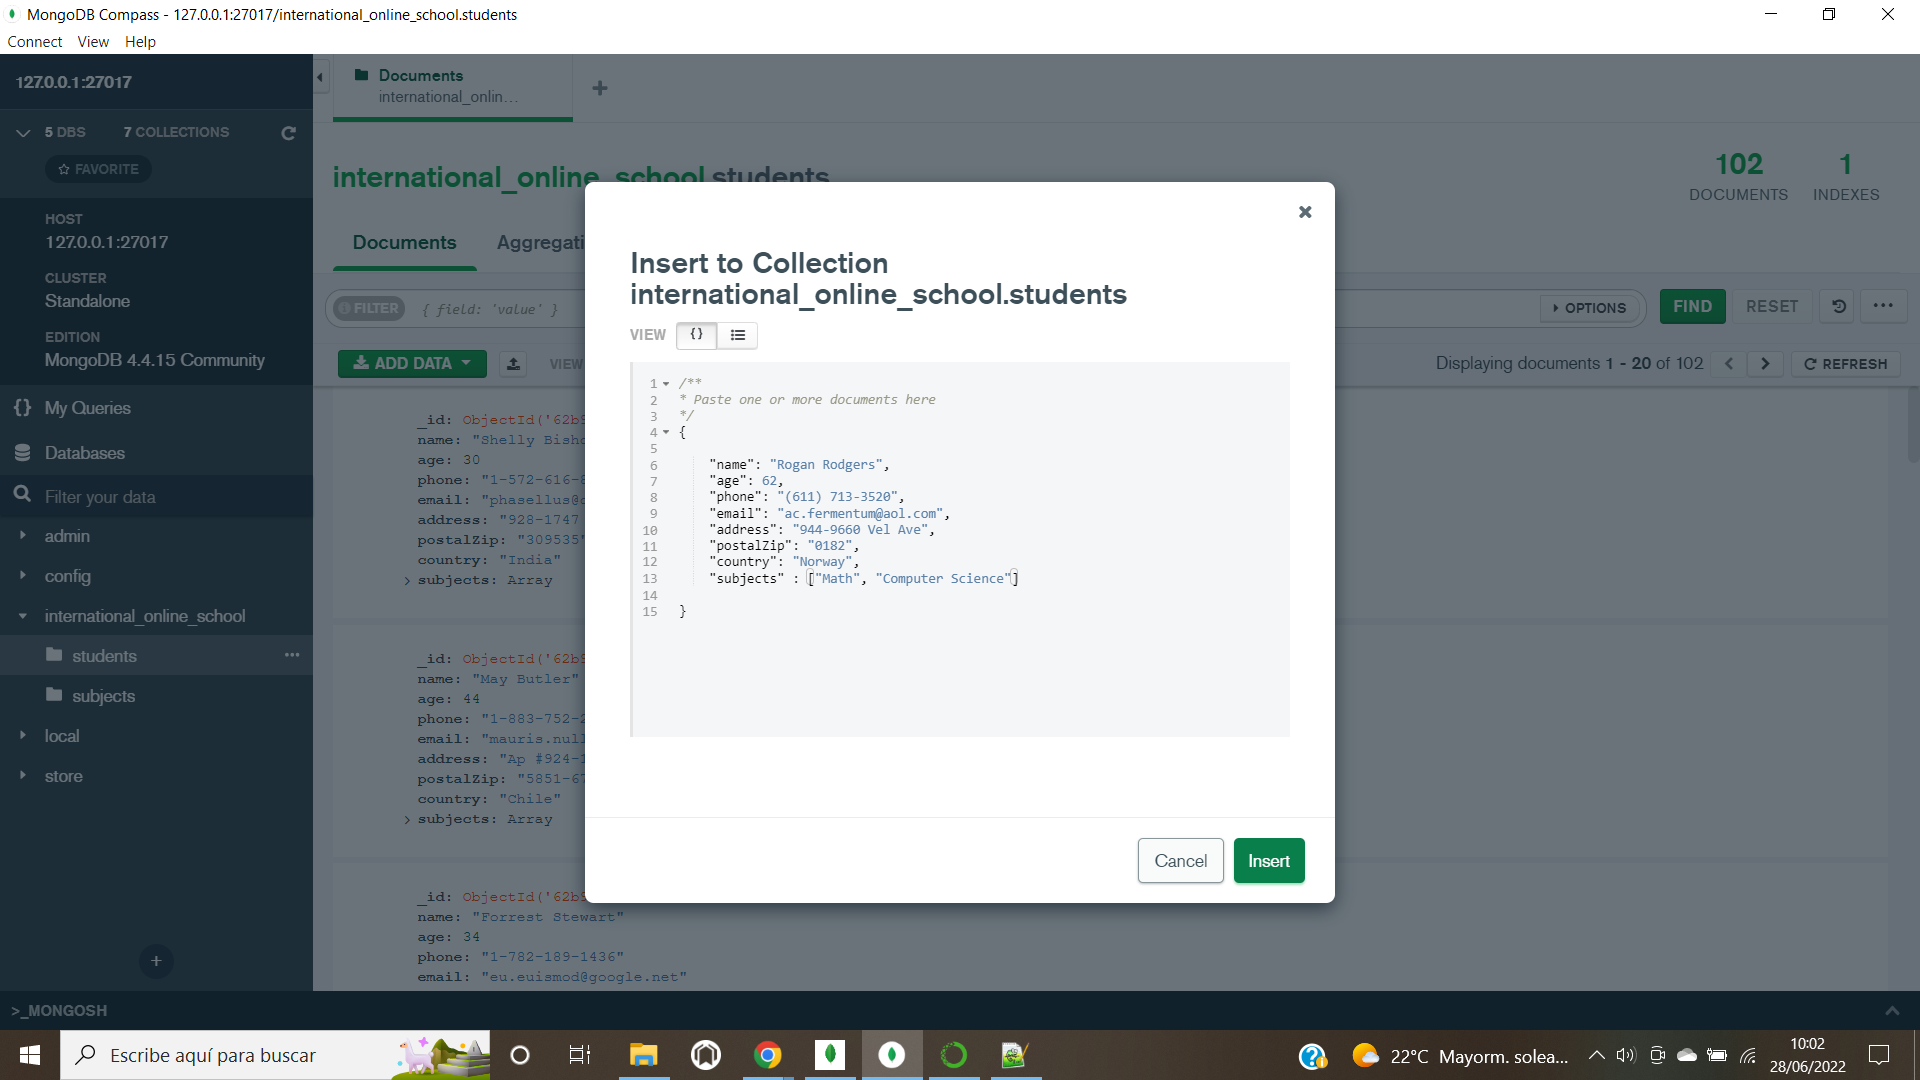

+ **students collection** contains 102 documents.
+ **subjects collection** contains 10 documents.

#### - Exercici 2

Connecta la base de dades NoSQL a Python utilitzant per exemple pymongo.

In [3]:
from pymongo import MongoClient
client = MongoClient()
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

+ Access to our Mongo Database: 

In [5]:
school_db = client['international_online_school']
school_db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'international_online_school')

+ We can check the collections that our database contains: 

In [6]:
school_db.list_collection_names()

['students', 'subjects']

+ Access the collections in or database as pandas Dataframes, first we will access **"students"** collection: 

In [7]:
# convert our collection to a pandas dataframe 
students_df = pd.DataFrame(list(school_db.students.find({})))
students_df.head()

,_id,name,age,phone,email,address,postalZip,country,subjects
0,62b97ddecca9e60e5a4c97a2,Shelly Bishop,30,1-572-616-8942,phasellus@outlook.ca,928-1747 Arcu St.,309535,India,"[Computer Science, Biology]"
1,62b97f5bcca9e60e5a4c97a6,May Butler,44,1-883-752-2888,mauris.nulla.integer@outlook.org,Ap #924-1745 Nisl. Avenue,5851-6726,Chile,"[Math, Music]"
2,62b982e5cca9e60e5a4c97ac,Forrest Stewart,34,1-782-189-1436,eu.euismod@google.net,"P.O. Box 581, 8435 Erat. Av.",82360-734,Chile,Computer Science
3,62b982e5cca9e60e5a4c97ad,Carson Rios,36,(447) 167-4297,dapibus.quam@google.com,Ap #753-1449 Et Rd.,75021,New Zealand,Physics
4,62b982e5cca9e60e5a4c97ae,Shaeleigh Dale,66,1-525-268-6918,elit.a@aol.org,"804-6569 Eu, Rd.",40573,India,"[Music, Literature]"


In [8]:
print("students_df contains", students_df.shape[0], "rows and", students_df.shape[1], "columns.")

students_df contains 102 rows and 9 columns.


This collection contains personal data about our students and the subjects they are taking. We observe that 'subjects' column can contain a single element or a list of subjects that the student is enrolled in. 

+ Let´s connect **"subjects"** collection

In [9]:
# subjects_df 
subjects_df = pd.DataFrame(list(school_db.subjects.find({})))
subjects_df

,_id,subject,duration_hours,teacher,e-mail
0,62b96e8fcca9e60e5a4c978e,Math,600,Orli Roman,quis.lectus@outlook.org
1,62b96e8fcca9e60e5a4c978f,History,450,Brett Morton,brett@hotmail.edu
2,62b96e8fcca9e60e5a4c9790,Music,500,Erin Mclean,erin@yahoo.net
3,62b96e8fcca9e60e5a4c9791,Literature,500,Rashad Dawson,rashad.dawson@outlook.edu
4,62b96e8fcca9e60e5a4c9792,Computer Science,800,Galvin Sawyer,sawyer@outlook.net
5,62b96e8fcca9e60e5a4c9793,Biology,570,Daniel Estes,daniel_estes@aol.com
6,62b96e8fcca9e60e5a4c9794,Social Estudies,450,Kyra Lewis,kyra@icloud.com
7,62b96e8fcca9e60e5a4c9795,Physics,630,Fulton Sanchez,fulton@mauris@protonmail.org
8,62b96e8fcca9e60e5a4c9796,Chemistry,600,Edan Solomon,edan-solomon@outlook.org
9,62b96e8fcca9e60e5a4c9797,English,300,Zephr Short,zephr@icloud.org


In [12]:
print("subjects_df contains", subjects_df.shape[0], "rows and", subjects_df.shape[1], "columns.")

subjects_df contains 10 rows and 5 columns.


This collection contains the duration of each subject and info about its teacher. 

### Nivell 2

#### - Exercici 1

Carega algunes consultes senzilles a un Pandas Dataframe. 

+ **Query to check the number of students in the school:**

In [13]:
# check the number od students: 
students_collection = school_db.students
n_students = students_collection.count_documents({}) #gives the number of documents in the table

print("We have", n_students, 'students in the school.')

We have 102 students in the school.


+ **Query to search for a particular student:** 

In [29]:
# we will search if a student named George Hayden exists in our collection: 
query_name = {'name': 'George Hayden'} 

result = students_collection.find(query_name)

# get all the info about this student
for x in result: 
    print(x)
    

{'_id': ObjectId('62b982e5cca9e60e5a4c97bf'), 'name': 'George Hayden', 'age': 60, 'phone': '1-837-562-3442', 'email': 'erat@icloud.couk', 'address': 'P.O. Box 947, 2096 Ipsum Rd.', 'postalZip': '62813', 'country': 'Nigeria', 'subjects': 'English'}


+ **Query to insert new data:** 

In [32]:
# insert multiple students at the same time 
# add 2 new students
new_students = [{'name': 'Angela Peterson', 
              'age': 27, 
              'phone': 4478956784, 
              'email': 'angela@ggmail.com', 
              'address': 'Liberty Avenue 75', 
              'postalZip': 418792, 
              'country': 'Japan', 
              'subjects' : 'Math'}, 
              {'name': 'Joe Lorenzo', 
              'age': 45, 
              'phone': 528749685, 
              'email': 'joe@ggmail.org', 
              'address': 'Elm Street 25', 
              'postalZip': 528795, 
              'country': 'Greece', 
              'subjects' : 'Music'}]
new = students_collection.insert_many(new_students)
new.inserted_ids

[ObjectId('62c16008b6188b77799efa65'), ObjectId('62c16008b6188b77799efa66')]

We see mongo automatically generates 2 new indexes for the new generated students. Let's check again the number of students: 

In [33]:
n_students = students_collection.count_documents({}) #gives the number of documents in the table
print("We have", n_students, 'students in the school.')

We have 104 students in the school.


+ **Query to delete a student from the database:**

In [40]:
# we will delete one student from our database: 
# delete student with name Halee Lee
delete_query = students_collection.delete_one({"name": 'Halee Lee'})

n_students = students_collection.count_documents({}) #gives the number of documents in the table
print("We have", n_students, 'students in the school.')

We have 103 students in the school.


We now have one less student so we have correctly eliminated the student. 

+ **Query to filter all students that fulfill a condiction:**

In [34]:
# we will look for the students that come from India
india_students = students_collection.find({"country": 'India'})

for i in india_students: 
    
    print(i)

number = india_students.count()

print('')
print('We have', number, 'students from India.')

{'_id': ObjectId('62b97ddecca9e60e5a4c97a2'), 'name': 'Shelly Bishop', 'age': 30, 'phone': '1-572-616-8942', 'email': 'phasellus@outlook.ca', 'address': '928-1747 Arcu St.', 'postalZip': '309535', 'country': 'India', 'subjects': ['Computer Science', 'Biology']}
{'_id': ObjectId('62b982e5cca9e60e5a4c97ae'), 'name': 'Shaeleigh Dale', 'age': 66, 'phone': '1-525-268-6918', 'email': 'elit.a@aol.org', 'address': '804-6569 Eu, Rd.', 'postalZip': '40573', 'country': 'India', 'subjects': ['Music', 'Literature']}
{'_id': ObjectId('62b988ebcca9e60e5a4c97dd'), 'name': 'Jared Hampton', 'age': 56, 'phone': '1-715-329-0951', 'email': 'rhoncus@aol.ca', 'address': '986-6238 Eget, Rd.', 'postalZip': '6815', 'country': 'India', 'subjects': 'Computer Science'}

We have 3 students from India.


In [39]:
# we can convert the data of these  students to a dataframe: 

india_students_df = pd.DataFrame(list(students_collection.find({"country": 'India'})))
india_students_df

,_id,name,age,phone,email,address,postalZip,country,subjects
0,62b97ddecca9e60e5a4c97a2,Shelly Bishop,30,1-572-616-8942,phasellus@outlook.ca,928-1747 Arcu St.,309535,India,"[Computer Science, Biology]"
1,62b982e5cca9e60e5a4c97ae,Shaeleigh Dale,66,1-525-268-6918,elit.a@aol.org,"804-6569 Eu, Rd.",40573,India,"[Music, Literature]"
2,62b988ebcca9e60e5a4c97dd,Jared Hampton,56,1-715-329-0951,rhoncus@aol.ca,"986-6238 Eget, Rd.",6815,India,Computer Science


+ **Query to to filter results with operators (2 conditions):** 

In [41]:
# filter all students that are either from Australia or from Spain 
# in the result we onlyb want to query their name, subjects and country
filtered_query = students_collection.find({
    "country" : { "$in" : [ "Spain", "Australia"] }
}, { "name": 1, "subjects": 1, "country": 1, "_id": 0})

for i in filtered_query: 
    print(i)

{'name': 'Kelly Avila', 'country': 'Australia', 'subjects': ['Chemistry', 'Biology']}
{'name': 'Steven Cardenas', 'country': 'Spain', 'subjects': ['Math', 'Computer Science']}
{'name': 'Amaya Wright', 'country': 'Spain', 'subjects': 'History'}
{'name': 'Julian Bradford', 'country': 'Australia', 'subjects': ['Math', 'Computer Science']}
{'name': 'Melanie Dodson', 'country': 'Spain', 'subjects': ['Math', 'Computer Science']}
{'name': 'Craig Lamb', 'country': 'Spain', 'subjects': 'Music'}
{'name': 'Seth Robbins', 'country': 'Australia', 'subjects': ['Physics', 'Math']}
{'name': 'Kermit Bond', 'country': 'Australia', 'subjects': 'Social Estudies'}
{'name': 'Salvador Jennings', 'country': 'Australia', 'subjects': 'History'}
{'name': 'Wesley Petersen', 'country': 'Australia', 'subjects': 'Biology'}
{'name': 'Emery Blake', 'country': 'Spain', 'subjects': 'Biology'}


We will turn this info of all students from Spain and Australia to a Dataframe:

In [43]:
# turn this same info to a df: 
filtered_query = students_collection.find({
    "country" : { "$in" : [ "Spain", "Australia"] }
}, { "name": 1, "subjects": 1, "country": 1, "_id": 0})

filtered_df = pd.DataFrame(list(filtered_query))
filtered_df

,name,country,subjects
0,Kelly Avila,Australia,"[Chemistry, Biology]"
1,Steven Cardenas,Spain,"[Math, Computer Science]"
2,Amaya Wright,Spain,History
3,Julian Bradford,Australia,"[Math, Computer Science]"
4,Melanie Dodson,Spain,"[Math, Computer Science]"
5,Craig Lamb,Spain,Music
6,Seth Robbins,Australia,"[Physics, Math]"
7,Kermit Bond,Australia,Social Estudies
8,Salvador Jennings,Australia,History
9,Wesley Petersen,Australia,Biology


+ **Query to filter students with numerical conditions:**

We will extract info about all students with ages between 30 and 50 (included): 

In [45]:
# get a dataframe with students <=30 or >=50
query_age = students_collection.find({"age": {"$gte" : 30,  "$lte" : 50}})
ages_df = pd.DataFrame(list(query_age))
ages_df.head()

,_id,name,age,phone,email,address,postalZip,country,subjects
0,62b97ddecca9e60e5a4c97a2,Shelly Bishop,30,1-572-616-8942,phasellus@outlook.ca,928-1747 Arcu St.,309535,India,"[Computer Science, Biology]"
1,62b97f5bcca9e60e5a4c97a6,May Butler,44,1-883-752-2888,mauris.nulla.integer@outlook.org,Ap #924-1745 Nisl. Avenue,5851-6726,Chile,"[Math, Music]"
2,62b982e5cca9e60e5a4c97ac,Forrest Stewart,34,1-782-189-1436,eu.euismod@google.net,"P.O. Box 581, 8435 Erat. Av.",82360-734,Chile,Computer Science
3,62b982e5cca9e60e5a4c97ad,Carson Rios,36,(447) 167-4297,dapibus.quam@google.com,Ap #753-1449 Et Rd.,75021,New Zealand,Physics
4,62b982e5cca9e60e5a4c97b0,Kelly Avila,30,(237) 273-6612,sociosqu.ad@outlook.org,713-9332 At Rd.,12547,Australia,"[Chemistry, Biology]"


If we want to get the number of students that satisfy these conditions we can do: 

In [47]:
print('There are',len(ages_df), 'students with ages between 30 and 50 years.')

There are 41 students with ages between 30 and 50 years.


+ **Simple query on the subjects collection**

We can also query the subjects collection, for example we want to know the info about the teacher who teaches the subject Biology, we will extract this info as a dataframe: 

In [57]:
biology_df = pd.DataFrame(list(school_db.subjects.find({"subject": "Biology"})))
biology_df

,_id,subject,duration_hours,teacher,e-mail
0,62b96e8fcca9e60e5a4c9793,Biology,570,Daniel Estes,daniel_estes@aol.com


### Nivell 3

#### - Exercici 1

Genera un resum estadístic de la informació que conté la base de dades.

+ **Get country counts from students collection:**

We can get the info about how many students from each country we have: 

In [59]:
# firts we get the list of countries 
# we will only extract info about the country, nothing else 
query_countries = students_collection.find( {}, { "country": 1, "_id": 0})

countries_df= pd.DataFrame(list(query_countries))
countries_df.head()

,country
0,India
1,Chile
2,Chile
3,New Zealand
4,India


In [60]:
# now we use value counts: 
countries_counts = countries_df.value_counts().rename_axis('Countries').reset_index(name= 'Counts')
countries_counts.head()

,Countries,Counts
0,Australia,6
1,Spain,5
2,Vietnam,5
3,Brazil,5
4,Canada,4


In [68]:
# unique values in countries
countries_counts.Countries.unique()

array(['Australia', 'Spain', 'Vietnam', 'Brazil', 'Canada', 'Indonesia',
       'United States', 'South Korea', 'Pakistan', 'Norway', 'Nigeria',
       'New Zealand', 'Netherlands', 'China', 'Germany', 'Turkey',
       'South Africa', 'Singapore', 'France', 'India', 'Chile',
       'Russian Federation', 'Belgium', 'Costa Rica', 'Colombia',
       'Sweden', 'Ukraine', 'Italy', 'Greece', 'Philippines', 'Ireland',
       'Mexico', 'Japan', 'United Kingdom'], dtype=object)

In [70]:
print("We have students from", len(countries_counts.Countries.unique()), "different countries in our school.")

We have students from 34 different countries in our school.


We have students from 34 different students, let´s **plot the top 10 countries:**

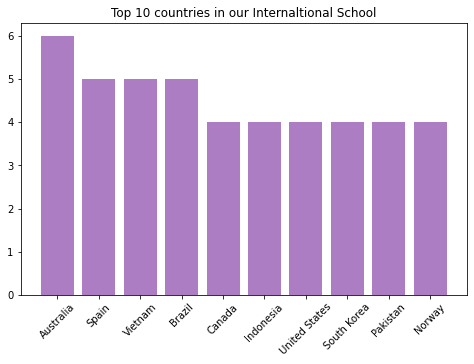

In [110]:
plt.figure(figsize = (8, 5))

plt.bar(countries_counts[:10]['Countries'], countries_counts[:10]['Counts'], color = '#ad7dc4' )
plt.xticks(rotation = 45)
plt.title('Top 10 countries in our Internaltional School', fontsize = 12)
plt.show()

+ **Get the count on the subjects:**

Let's see which subjects are the most common among students. 

In [84]:
# get the counts on each subject
query_subjects = students_collection.find( {},{ "subjects": 1, "_id": 0})

subjects_df = pd.DataFrame(list(query_subjects))

subjects_df.head()

,subjects
0,"[Computer Science, Biology]"
1,"[Math, Music]"
2,Computer Science
3,Physics
4,"[Music, Literature]"


Some rows contain the subject but others contain a list os subjects, let´s extract this info:  

In [85]:
subjects_df_expanded = subjects_df['subjects'].apply(pd.Series)
subjects_df_expanded.head()

,0,1,2
0,Computer Science,Biology,NaN
1,Math,Music,NaN
2,Computer Science,NaN,NaN
3,Physics,NaN,NaN
4,Music,Literature,NaN


First we will apply value_counts() for each column separately and lastly we will concantenate the columns: 

In [86]:
subjects1 = subjects_df_expanded.iloc[:, 0].value_counts().rename_axis('Subjects1').reset_index(name= 'Counts1')
subjects2 = subjects_df_expanded.iloc[:, 1].value_counts().rename_axis('Subjects2').reset_index(name= 'Counts2')
subjects3 = subjects_df_expanded.iloc[:, 2].value_counts().rename_axis('Subjects3').reset_index(name= 'Counts3')

total_subjects = pd.concat([subjects1.set_index('Subjects1'),subjects2.set_index('Subjects2'), 
                           subjects3.set_index('Subjects3')], axis= 1 )

In [87]:
total_subjects

,Counts1,Counts2,Counts3
Music,17,5.0,NaN
Math,16,5.0,NaN
Computer Science,11,8.0,NaN
Social Estudies,11,4.0,NaN
Physics,10,1.0,NaN
Biology,10,4.0,NaN
Literature,8,5.0,NaN
English,8,4.0,1.0
History,7,NaN,NaN
Chemistry,5,6.0,NaN


Now we will create a new column with the sum of total counts and drop the other columns: 

In [88]:
total_subjects['Total_counts'] = total_subjects.sum(axis= 1)
total_subjects.drop(['Counts1', 'Counts2', 'Counts3'],axis = 1 , inplace = True )
total_subjects.sort_values(by = 'Total_counts', ascending = False)

,Total_counts
Music,22.0
Math,21.0
Computer Science,19.0
Social Estudies,15.0
Biology,14.0
Literature,13.0
English,13.0
Physics,11.0
Chemistry,11.0
History,7.0


In [89]:
number_of_subjects = total_subjects['Total_counts'].sum(axis=0)
number_of_subjects

146.0

The most studied subject is Music and the least studied is History. 

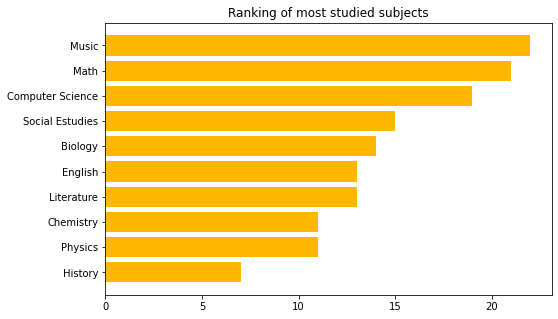

In [109]:
# if we want to plot this
plt.figure(figsize = (8, 5))
total_subjects_sorted = total_subjects.sort_values('Total_counts')
plt.barh(total_subjects_sorted.index, total_subjects_sorted['Total_counts'] , color = '#ffb700')
plt.title('Ranking of most studied subjects', fontsize = 12)
plt.show()

+ **Distribution of numerical attribute age**

From our student's data, we have the age attribute which is numerical, so we can look at its summary statistics and distribution. 

In [97]:
students_df[['age']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,102.0,43.13,15.72,18.0,29.25,43.5,57.0,69.0


+ The oldest student is 69 years old and the youngest is 18. 
+ The average age of our students is 43 years old. 

Let's plot the distribution of age: 

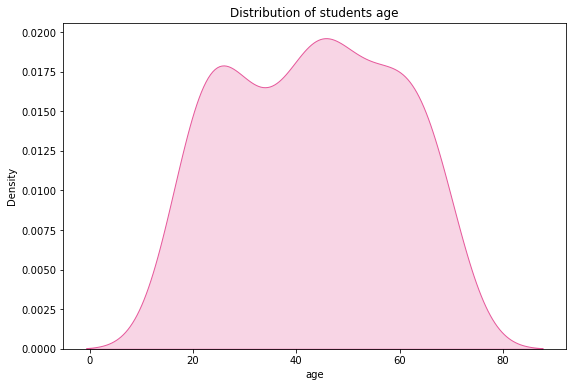

In [113]:
plt.figure(figsize= (9,6))
sns.kdeplot(students_df['age'], label= 'age', fill = True, color = '#e6589b')
plt.title('Distribution of students age', fontsize = 12)

plt.show()